# financial-inclusion-in-africa20250311-22142-nbnoiv

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Suppress warnings for better readability

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


# loading datasets path

In [4]:
os.chdir(r"C:\Users\AMOS\Desktop\financial-inclusion-in-africa20250311-22142-nbnoiv")
os.getcwd()

'C:\\Users\\AMOS\\Desktop\\financial-inclusion-in-africa20250311-22142-nbnoiv'

In [5]:
target="bank_account"

In [6]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
subs=pd.read_csv('SampleSubmission.csv')

In [7]:
train.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


# VISUALIZATION EXPORATORY DATA ANALYSIS

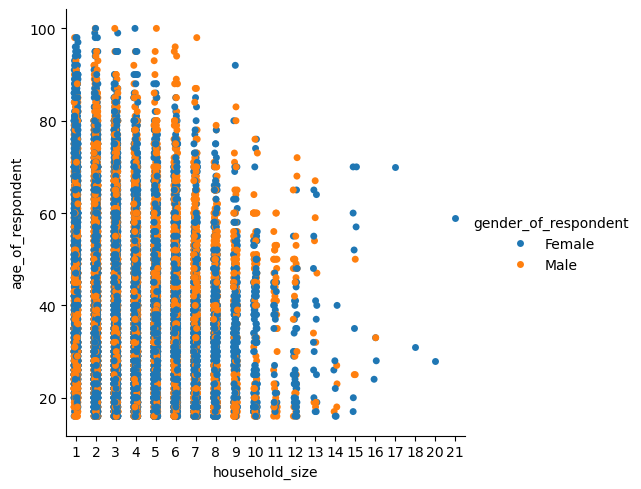

In [8]:
sns.catplot(x='household_size', y='age_of_respondent', data=train , hue='gender_of_respondent')

In [9]:
train.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [10]:
test.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

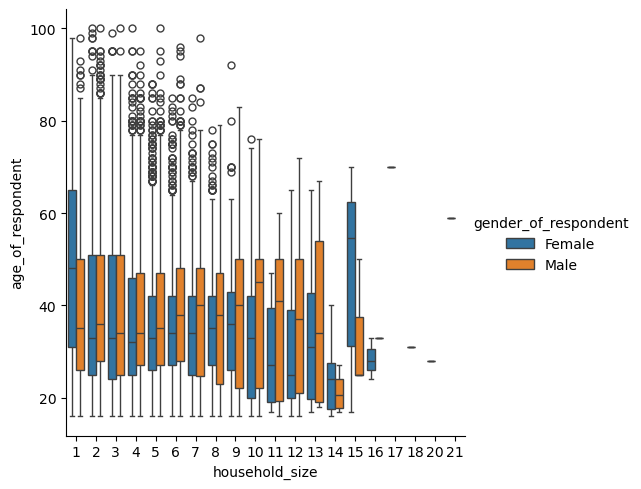

In [11]:
sns.catplot(x='household_size', y='age_of_respondent', data=train , hue='gender_of_respondent', kind='box')

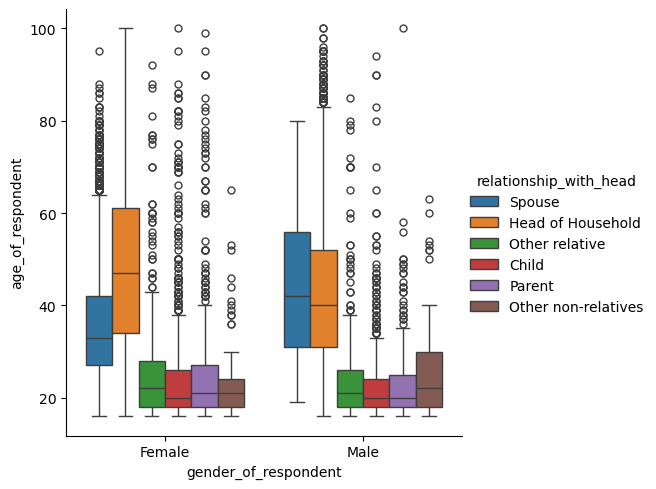

In [12]:
sns.catplot(x='gender_of_respondent', y='age_of_respondent', data=train , hue='relationship_with_head', kind='box')

In [13]:
train.shape,test.shape

((23524, 13), (10086, 12))

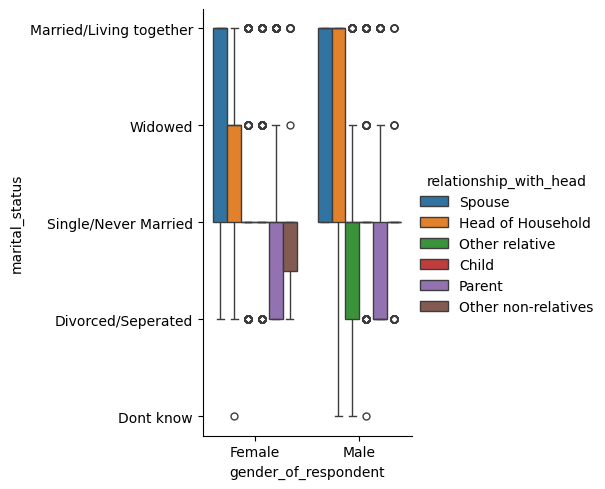

In [14]:
sns.catplot(x='gender_of_respondent', y='marital_status', data=train , hue='relationship_with_head', kind='box')

In [15]:
train['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

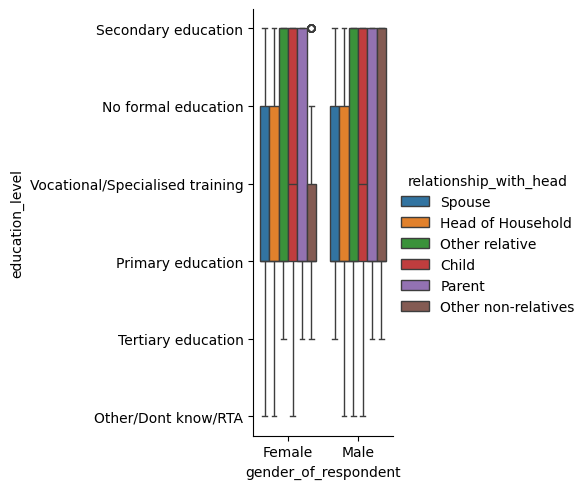

In [16]:
sns.catplot(x='gender_of_respondent',
            y='education_level',
            data=train , hue='relationship_with_head', kind='box')

In [17]:
train['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

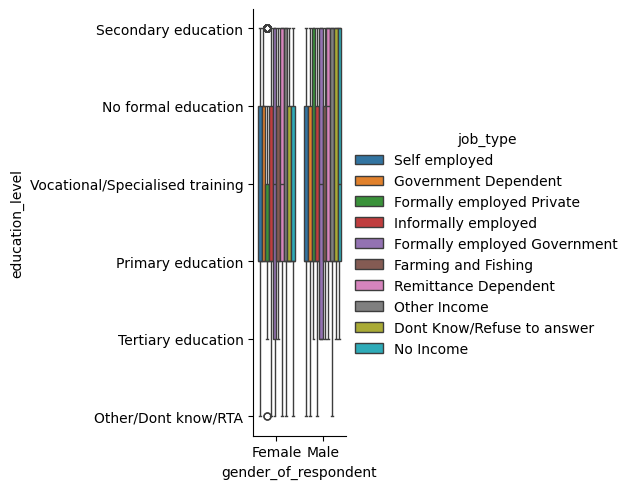

In [18]:
sns.catplot(x='gender_of_respondent',
            y='education_level',
            data=train , hue='job_type', kind='box')

In [19]:
test['education_level'].value_counts()

education_level
Primary education                  5479
Secondary education                1902
No formal education                1836
Tertiary education                  492
Vocational/Specialised training     359
Other/Dont know/RTA                  18
Name: count, dtype: int64

In [20]:
train.groupby('age_of_respondent')['household_size'].mean()

age_of_respondent
16     5.002165
17     4.855346
18     4.806838
19     4.489362
20     3.998403
         ...   
96     2.666667
97     1.000000
98     2.333333
99     2.500000
100    3.200000
Name: household_size, Length: 85, dtype: float64

In [21]:
# from custom_box import box_plot
# box_plot('age_of_respondent')

In [22]:
train['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [23]:
train['bank_account']=train['bank_account'].replace({'Yes':1,'No':0})

In [24]:
col=[
    'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'
    
]

In [25]:
le=LabelEncoder()

In [26]:
train[col]=train[col].apply(le.fit_transform)

In [27]:
col2=[
    'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'
    
]

In [28]:
test[col2]=test[col2].apply(le.fit_transform)

In [29]:
train.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,2,8,0,5,2,3,9
1,Kenya,2018,uniqueid_2,0,0,0,4,54,0,1,4,0,4
2,Kenya,2018,uniqueid_3,1,1,1,4,10,1,3,3,5,9


In [30]:
test.head(3)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,2,14,1,1,2,3,2
1,Kenya,2018,uniqueid_6060,1,1,6,35,1,1,2,5,3
2,Kenya,2018,uniqueid_6065,0,0,2,61,0,4,2,0,8


In [31]:
train['education_level'].dtype,train['job_type'].dtype,train['marital_status'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [32]:
test['education_level'].dtype,test['job_type'].dtype,test['marital_status'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

# Handling missing values

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.3+ MB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  int64 
 4   cellphone_access        10086 non-null  int64 
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  int64 
 8   relationship_with_head  10086 non-null  int64 
 9   marital_status          10086 non-null  int64 
 10  education_level         10086 non-null  int64 
 11  job_type                10086 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 945.7+ KB


In [35]:
train.isnull().mean()*100

country                   0.0
year                      0.0
uniqueid                  0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64

In [36]:
columns=train.columns
missing_column=train.isnull().sum()
df=pd.DataFrame(missing_column, columns)

In [37]:
df

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [38]:
test.isnull().mean()*100

country                   0.0
year                      0.0
uniqueid                  0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64

In [39]:
train.drop(columns=['country','year','uniqueid'], axis=1, inplace=True)

In [40]:
test.drop(columns=['country','year','uniqueid'], axis=1, inplace=True)

In [41]:
train.corr()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
bank_account,1.000000,0.087288,0.209669,-0.028319,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.087288,1.000000,-0.085238,-0.257325,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,0.209669,-0.085238,1.000000,0.091450,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.028319,-0.257325,0.091450,1.000000,-0.129776,0.014612,0.104041,-0.127758,0.001645,-0.156898
age_of_respondent,0.019429,-0.047373,-0.103611,-0.129776,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,0.117234,0.012924,0.102370,0.014612,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,-0.070853,0.017042,-0.048705,0.104041,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,-0.038739,0.080406,-0.094195,-0.127758,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011
education_level,0.323768,0.126128,0.252970,0.001645,-0.352970,0.119883,-0.017141,-0.123628,1.000000,0.043823
job_type,-0.064171,0.368606,-0.146141,-0.156898,-0.102770,-0.029734,0.041006,0.056011,0.043823,1.000000


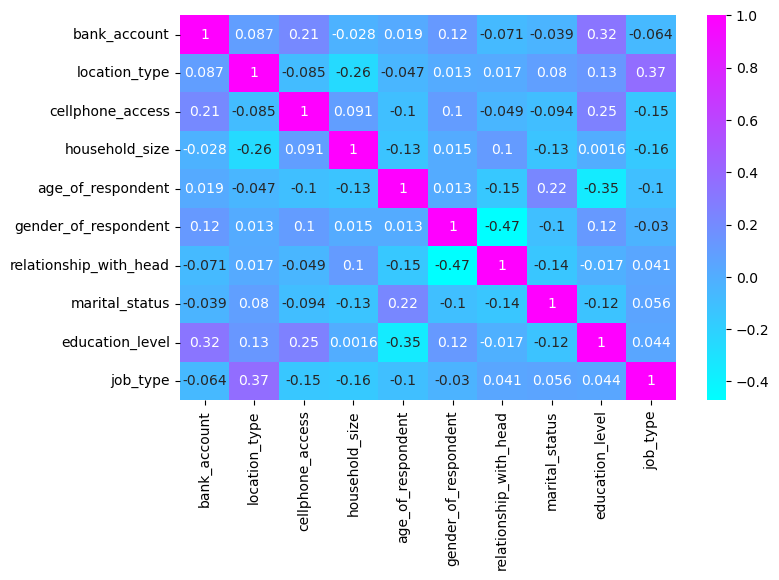

In [42]:
f, ax=plt.subplots(1,1, figsize=(8,5))
ax=sns.heatmap(train.corr(), annot=True, cmap='cool')

In [43]:
train['job_type']

0        9
1        4
2        9
3        3
4        5
        ..
23519    7
23520    7
23521    7
23522    9
23523    6
Name: job_type, Length: 23524, dtype: int64

In [44]:
train.columns

Index(['bank_account', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [45]:
test.columns

Index(['location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [46]:
X_test=test

In [47]:
X= train.drop(['bank_account'], axis=1)
y= train['bank_account']

In [48]:
import pandas as pd
import numpy as np


In [49]:
X

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,1,2,8,0,5,2,3,9
1,0,0,4,54,0,1,4,0,4
2,1,1,4,10,1,3,3,5,9
3,0,1,4,18,0,1,2,2,3
4,1,0,7,10,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...
23519,0,1,3,32,0,1,0,0,7
23520,0,1,1,11,0,1,3,3,7
23521,0,1,4,11,0,4,4,2,7
23522,1,1,6,14,0,4,0,3,9


In [50]:
type(X)

pandas.core.frame.DataFrame

In [51]:
X=np.array(X)
y=np.array(y)

In [52]:
X_test=np.array(test)

In [54]:
import torch

In [55]:
X_test=torch.from_numpy(X_test).type(torch.float)

In [56]:
X_test

tensor([[1., 1., 2.,  ..., 2., 3., 2.],
        [1., 1., 6.,  ..., 2., 5., 3.],
        [0., 0., 2.,  ..., 2., 0., 8.],
        ...,
        [1., 1., 0.,  ..., 3., 3., 7.],
        [0., 1., 5.,  ..., 2., 2., 9.],
        [1., 1., 6.,  ..., 3., 3., 7.]])

In [57]:
type(X)

numpy.ndarray

In [58]:
import torch
x=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [59]:
x

tensor([[0., 1., 2.,  ..., 2., 3., 9.],
        [0., 0., 4.,  ..., 4., 0., 4.],
        [1., 1., 4.,  ..., 3., 5., 9.],
        ...,
        [0., 1., 4.,  ..., 4., 2., 7.],
        [1., 1., 6.,  ..., 0., 3., 9.],
        [0., 1., 9.,  ..., 3., 3., 6.]])

In [60]:
y

tensor([1., 0., 1.,  ..., 0., 0., 0.])

In [61]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X,y)
y_hat=lg.predict()

In [ ]:
X

In [ ]:
print(y)

In [ ]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(X,y , stratify = y,
                                                  test_size = 0.1, random_state=42)

In [ ]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X,y)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

In [ ]:
# Get the predicted result for the test Data
test1= xg_model.predict(X_test)

In [ ]:
test1

In [ ]:
subss=pd.DataFrame(test1)

In [ ]:
test2002=pd.read_csv('Test.csv')

In [ ]:
submission = pd.DataFrame({"uniqueid": test2002["uniqueid"] + " x " + test2002["country"],
                           "bank_account": test1})

In [ ]:
submission.to_csv("subm01234.csv", index=False)

# VISUALIZE THE FEATURE IMPORTANCE AFTER MODELLING¶

In [ ]:
# # 0.7912081488646163
feature_importance_df = pd.DataFrame(xg_model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sn.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance (top 50):')